In [1]:
import sys

print(sys.executable)  # 打印当前的 Python 解释器路径

import ipykernel

print(ipykernel.__file__)  # 打印当前的 ipykernel 包路径

/Users/captain/miniconda3/envs/dbscan/bin/python
/Users/captain/miniconda3/envs/dbscan/lib/python3.10/site-packages/ipykernel/__init__.py


In [27]:
import pandas as pd

from tsne import TSNEDisplayer
from tfidf import TfidfClz
from bert import Text2VecClz
from analysis import analysis
import numpy as np
import os

# 设置工作空间 & 读取数据
train = pd.read_csv('./train.csv', sep='\t')
print(train.sample(10))
# for i in range(10):
#     print(train["comment"][i])

      label                                            comment
9376      0                                  还不错，清洁阿姨很勤快，菜品算新鲜
2613      1                 #红烧肉套餐#我爸吃了肚子疼，头晕，你们这个鸡蛋或者豆豆是不是很久了
5453      1  选了很多家，最后选了这个。结果太失望了。没有一只小龙虾是可以整条肉扯出来的，都是粉了的。为什...
6268      0                        真的很划算，而且服务态度也很好。希望多出一点这样的活动
9465      0                                  还不错，老顾客，味道可以，分量挺足
4224      0                                     每次去日月光都要吃的 很美味
1086      0                      一如既往的好，经常去吃，儿子喜欢，比肯德基麦当劳好吃得多！
4597      0                                      不好吃油少麻辣不行只有盐水
9874      1      饭菜一点都不新鲜，泡椒鸡杂有股说不出来的馊味，回锅肉也是，也不知道吃完会不会食物中毒，差评
4075      0                                         很好。分量足。味道好


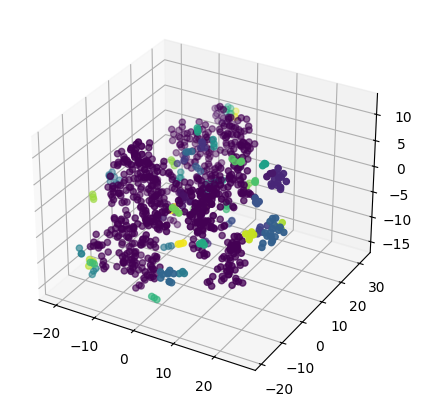

蛋糕很好吃，送货及时，服务一流啊，下次有机会继续买。
蛋糕蛮好吃的，服务态度也很好。
味道还不错，蛋糕也很漂亮，服务员的态度也挺不错
服务很好，蛋糕也很好吃，值得购买
蛋糕味道很好，店里服务很好，值得购买！！
蛋糕很好吃，服务态度好，环境不错，下次再来
蛋糕味道极好，服务也很周到，下次还会再来。
服务很好，下次还会在这家买，本来这个牌子的蛋糕就好吃而且便宜
蛋糕特别好看，味道非常好，送货准时，服务态度良好，下次还要在这家定做。
服务很好，蛋糕味道好，下次还定他家。
蛋糕很美味，服务也很好，，，。
服务态度很好，蛋糕也可以，不错不错
服务很热情，蛋糕也很好，下次还会来，推荐
很不错，地方很好找，工作人员的态度也很好，蛋糕很好吃，很好看。
蛋糕很好吃，服务员态度很好，棒棒哒

Cluster: -1
Number of comments in this cluster: 9107
Sample comments:
不油腻又鲜香，不错哟
为什么不拿筷子为什么不拿筷子不拿筷子
味道好，分量足，又便宜，棒棒哒
老板娘服务态度很好，味道很好！喜欢这里的环境，你如果喜欢也来试试哈
不是那个味，不怎么好吃。

Cluster: 0
Number of comments in this cluster: 681
Sample comments:
不错，已经吃过好几次了，赞一个
网上看到评价挺好的，味道真的挺好，服务也特别好
不错  味道可以  老板人很好 很周到 环境一般
服务态度很好，味道也还可以，值得推荐
环境很好，份量也很足，吃了几次了。值得推荐

Cluster: 1
Number of comments in this cluster: 15
Sample comments:
蛋糕很美味，服务也很好，，，。
味道还不错，蛋糕也很漂亮，服务员的态度也挺不错
服务很好，蛋糕也很好吃，值得购买
蛋糕很好吃，服务员态度很好，棒棒哒
服务很好，蛋糕味道好，下次还定他家。

Cluster: 2
Number of comments in this cluster: 8
Sample comments:
分量很足，两个人吃都吃不完。味道很好，菜都很入味。去了很多次了。
味道不错，分量也很足，两人都吃不完。
分量也忒足了点儿，两人餐两个人永远吃不完！哈哈哈，味道好吃！
味道可以，上菜也快

In [24]:



filename = 'embeddings.npz'

tfidf_matrix = None
if os.path.exists(filename):
    data = np.load(filename)
    tfidf_matrix = data['embeddings']
else:
    print(f"File: {filename} does not exist!")
    tfidf_matrix = Text2VecClz().text2vec(train['comment'])
    np.savez_compressed('embeddings.npz', embeddings=tfidf_matrix)

from sklearn.preprocessing import normalize

# 归一化 tfidf_matrix, 默认使用 'l2' 范数
tfidf_matrix = normalize(tfidf_matrix)

# 进行模型训练
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.4, min_samples=3).fit(tfidf_matrix)

pd.set_option('display.max_rows', 1000)
TSNEDisplayer().show(tfidf_matrix, clustering)
analysis(train, clustering)

